# Проект: Принятие решений в бизнесе


<b>Описание проекта:</b>

Мы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

<b>Цель исследования :</b> Выяснить - какая из гипотез приведет к наибольшему увеличению выручки, проанализировать результаты А/B-теста и понять, есть ли различие между группами.

<b>Часть 1. Приоритизация гипотез.</b>

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:
    
    1.1) Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    
    1.2) Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    
    1.3) Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

<b>Часть 2. Анализ A/B-теста</b>

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализируйте A/B-тест:

    2.1) Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    
    2.2) Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    
    2.3) Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.
         Сделайте выводы и предположения.
         
    2.4) Постройте график кумулятивного среднего количества заказов на посетителя по группам.
         Сделайте выводы и предположения.
         
    2.5) Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя
         группы B к группе A. Сделайте выводы и предположения.
    
    2.6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    
    2.7) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.
         Выберите границу для определения аномальных пользователей.
    
    2.8) Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    
    2.9) Посчитайте 95-й и 99-й перцентили стоимости заказов.
         Выберите границу для определения аномальных заказов.
    
    2.10) Посчитайте статистическую значимость различий в среднем количестве заказов
          на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
    
    2.11) Посчитайте статистическую значимость различий в среднем чеке заказа между
          группами по «сырым» данным. Сделайте выводы и предположения.   
    
    2.12) Посчитайте статистическую значимость различий в среднем количестве заказов
          на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
    
    2.13) Посчитайте статистическую значимость различий в среднем чеке заказа между группами
          по «очищенным» данным. Сделайте выводы и предположения. 
    
    2.14) Примите решение по результатам теста и объясните его. Варианты решений:
              1. Остановить тест, зафиксировать победу одной из групп.
              2. Остановить тест, зафиксировать отсутствие различий между группами.
              3. Продолжить тест.

##  Часть 1. Приоритизация гипотез.

Для начала загрузим необходимые библиотеки, исследуем данные из файла, проведём их предобработку, если она потребутся, и приступим к приоритизации гипотез

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


В данном файле присутствуют следующие столбцы:

    Hypothesis — краткое описание гипотезы;
    
    Reach — охват пользователей по 10-балльной шкале;
    
    Impact — влияние на пользователей по 10-балльной шкале;
    
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Проверим данные на пропуски и дубликаты

In [4]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [5]:
hypothesis.duplicated().sum()

0

Пропусков и дубликатов в таблице hypotesis нет.

Необходимые изменения:

    - привести названия столбцов к нижнему регистру

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


В данном разделе мы познакомились с данными, проверили данные на пропуски и дубликаты, также провели предобработку данных, приведя названия столбцов к нижнему регистру - теперь данные готовы для анализа

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [7]:
# Добавим стобец ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Лидируют гипотезы 9, 1, 8.

Вывод по разделу: наибольшее значение ICE имеет гипотеза 9 - "Запустить акцию, дающую скидку на товар в день рождения"

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [8]:
# Добавим стобец RICE
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Лидируют гипотезы 8, 3, 1, 7.

Вывод по разделу: с учётом охвата (reach), лидирует уже гипотеза под номером 8: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

При применении RICE наиболее приоритетными стали гипотезы 8, 3, 1, 7 вместо 9, 1, 8. 

Так получилось, потому что параметр reach у гипотез разный, например, гипотеза 9 с наибольшим значением ICE, имеет параметр reach равный единице, по всей видимости потому, что день рождения всего 1 раз в год и охватывает маленькое количество пользователей, в то время как добавление формы подписки на все основные страницы охватывает всех пользователей. Кроме силы гипотез, учитывается и то, как много пользователей она затронет.

<b>Вывод по разделу:</b> в качестве наиболее приоритетной возьмем гипотезу 8 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок', выбранную с применением фреймворка RICE

## Часть 2. Анализ A/B-теста

Так же, как и в первой части проекта, исследуем данные и проведём их предобработку при необходимости

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Описание данных:

    - transactionId — идентификатор заказа;
    - visitorId — идентификатор пользователя, совершившего заказ;
    - date — дата, когда был совершён заказ;
    - revenue — выручка заказа;
    - group — группа A/B-теста, в которую попал заказ.

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Проверим данные на пропуски и дубликаты

In [11]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
orders.duplicated().sum()

0

Пропусков и дубликатов в таблице orders нет.

Необходимые изменения:

    - привести названия столбцов к змеиному регистру
    - изменить формат в столбце date (datetime)

In [13]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Описание данных:

    - date — дата;
    - group — группа A/B-теста;
    - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Также проверим данные на пропуски и дубликаты

In [15]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [16]:
visitors.duplicated().sum()

0

Пропусков и дубликатов не оказалось и в таблице visitors.

Необходимые изменения:
    
    - привести колонку date - к формату datetime

<b>Предобработка данных</b>

In [17]:
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

orders['date'] = pd.to_datetime(orders['date'] )

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [18]:
visitors['date'] = pd.to_datetime(visitors['date'])

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


В результате предобработки данных исправлены нарушения стиля в наименовании столбцов и устранено несоотвествие типа данных в столбцах, в которых обозначена дата: с типа object на datetime. Дубликаты отсутствуют. Данные готовы для анализа.

<b>Рассчитаем кумулятивные метрики</b>

In [19]:
# создаем массив уникальных пар значений дат и групп теста
date_groups = orders[['date', 'group']].drop_duplicates()

display(date_groups)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Соберём агрегированные кумулятивные по дням данные о заказах.

In [20]:
orders_aggregated = date_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] 
                                                                      == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
orders_aggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [22]:
visitors_aggregated = date_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [23]:
visitors_aggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [24]:
# Объединим таблицы
cumulativeData = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Разделим данные на группы

In [25]:
cumulativeA = cumulativeData[cumulativeData['group']=='A']

cumulativeB = cumulativeData[cumulativeData['group']=='B']

cumulativeA

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,24,20,148579,719
2,2019-08-02,A,44,38,242401,1338
4,2019-08-03,A,68,62,354874,1845
6,2019-08-04,A,84,77,425699,2562
8,2019-08-05,A,109,100,549917,3318
10,2019-08-06,A,127,114,598401,3985
12,2019-08-07,A,145,131,740818,4629
14,2019-08-08,A,161,146,837097,5239
16,2019-08-09,A,177,159,1025603,5856
18,2019-08-10,A,193,175,1236098,6262


В результате мы получили 2 датафрейма для групп A и B, соответственно, с рассчитанными кумулятивными метриками в каждом из них

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

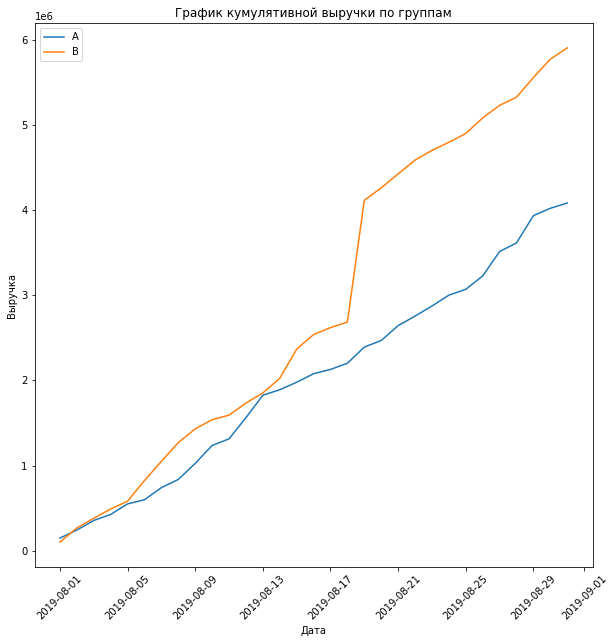

In [49]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10))

plt.plot(cumulativeA['date'], cumulativeA['revenue'], label='A')

plt.plot(cumulativeB['date'], cumulativeB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend();

Вывод по разделу: По графику видно, что изначально выручка группы B незначительно выше, но с середины резко возрастает и разрыв между группами становится ещё более значительным.

Возможно, подобное изменение произошло из-за крупных заказов, сделанных в тот период

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

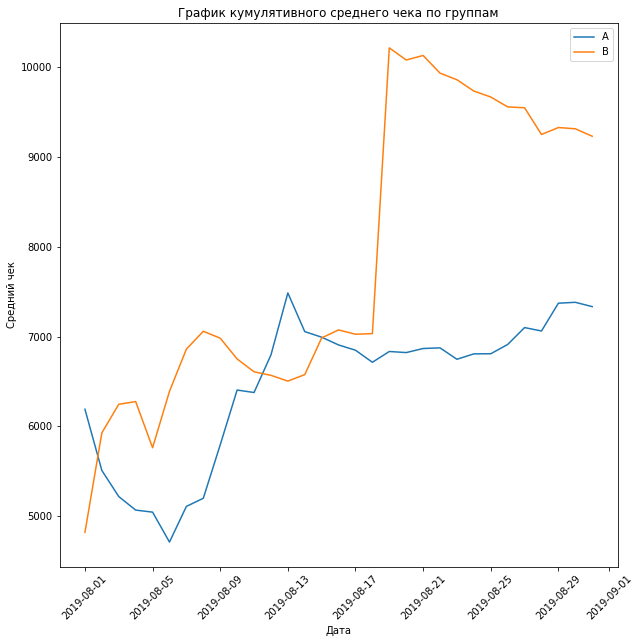

In [50]:
figure(figsize=(10, 10))

plt.plot(cumulativeA['date'], cumulativeA['revenue']/cumulativeA['transaction_id'], label='A')

plt.plot(cumulativeB['date'], cumulativeB['revenue']/cumulativeB['transaction_id'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.legend();

Вывод по разделу: В целом, по среднему чеку, так же, как и по выручке, доминирует группа B, но период с 11 по 15 августа мы видим, что средний чек у группы B был ниже значений группы А, но затем резко возрос, что подтверждает то, что в группе B в период с 18-20 августа была совершена крупная покупка, которая значительно увелечила размер среднего чека

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

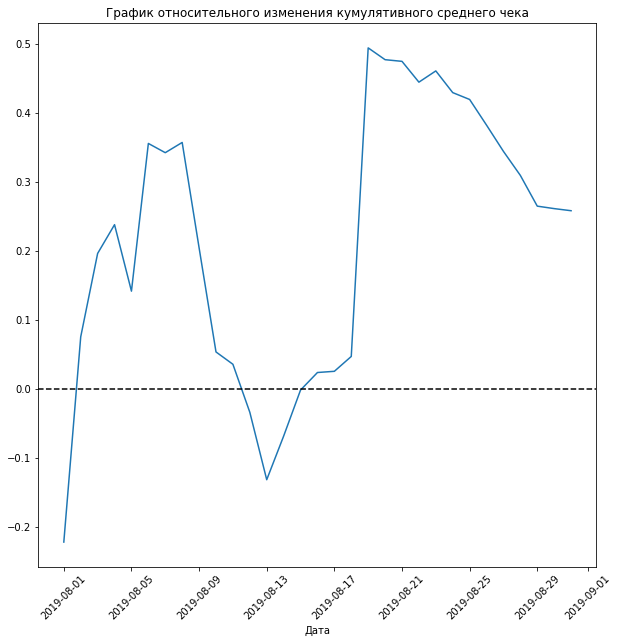

In [51]:
cumulativeDataMerged = cumulativeA.merge(cumulativeB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

figure(figsize=(10, 10))

plt.plot(cumulativeDataMerged['date'], (cumulativeDataMerged['revenueB']/cumulativeDataMerged['transaction_idB'])/(cumulativeDataMerged['revenueA']/cumulativeDataMerged['transaction_idA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--');

Вывод по разделу: Данный график подтверждает то, что показатели группы В по среднему чеку превосходят показатели группы А, но в то же время, данные показатели у группы В нестабильны, так как в период с 8 по 13 авугста был резкий спад, а потом такой же резкий рост до 20 августа. Вероятно, дело в "аномальных" значениях в обеих группах.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

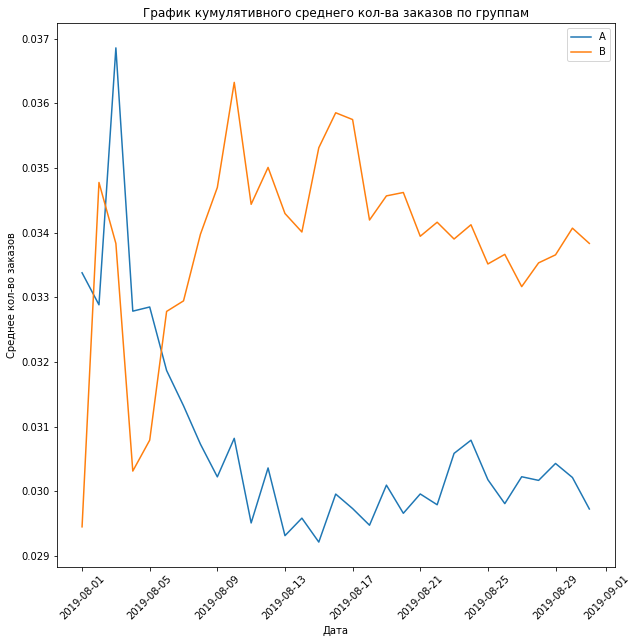

In [52]:
figure(figsize=(10, 10))

plt.plot(cumulativeA['date'], cumulativeA['transaction_id']/cumulativeA['visitors'], label='A')

plt.plot(cumulativeB['date'], cumulativeB['transaction_id']/cumulativeB['visitors'], label='B')

plt.title('График кумулятивного среднего кол-ва заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')
plt.xticks(rotation=45)
plt.legend();

Вывод по разделу: По графику кумулятивного среднего количества заказов вновь видно превосоходство группы В, начиная ~ с 6 августа. Среднее кол-во заказов у группы А значительно ниже, чем у группы B и продолжает снижаться

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

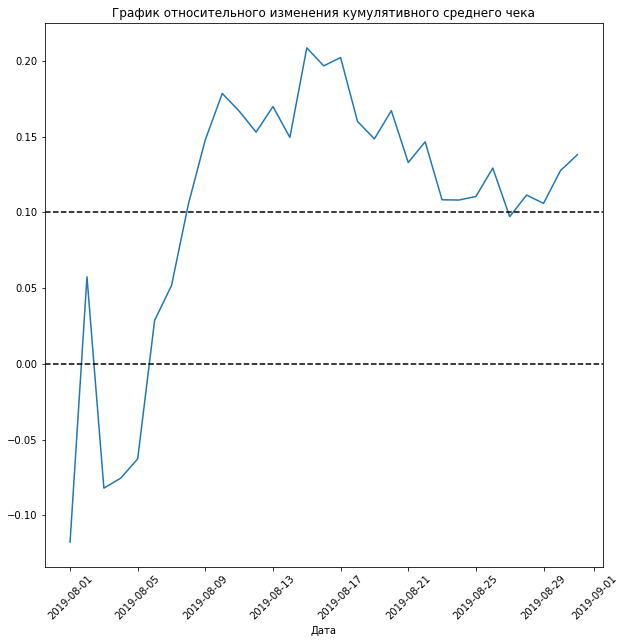

In [53]:
figure(figsize=(10, 10))

plt.plot(cumulativeDataMerged['date'], (cumulativeDataMerged['transaction_idB']/cumulativeDataMerged['visitorsB'])/(cumulativeDataMerged['transaction_idA']/cumulativeDataMerged['visitorsA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation=45)

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.10, color='black', linestyle='--');

Вывод по разделу: График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [31]:
orders_by_userA = orders[orders['group']=='A']\
                 .groupby('visitor_id', as_index=False)['transaction_id'].count()

orders_by_userB = orders[orders['group']=='B']\
                  .groupby('visitor_id', as_index=False)['transaction_id'].count()

orders_by_userA.head(5)

,visitor_id,transaction_id
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


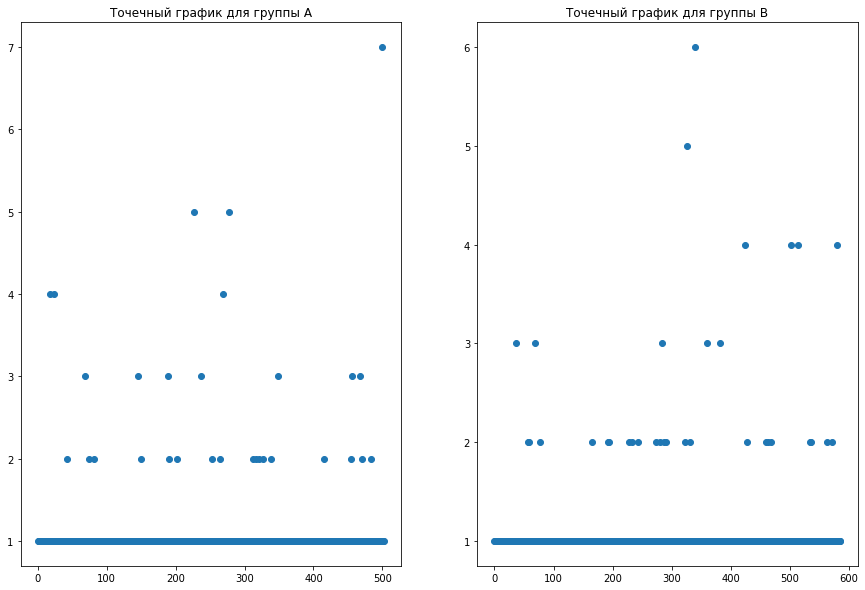

In [32]:
figure(figsize=(15, 10))

x_values = pd.Series(range(0,len(orders_by_userA)))
plt.subplot(1,2,1)
plt.title('Точечный график для группы А')
plt.scatter(x_values, orders_by_userA['transaction_id'])

x_values = pd.Series(range(0,len(orders_by_userB)))
plt.subplot(1,2,2)
plt.title('Точечный график для группы B')
plt.scatter(x_values, orders_by_userB['transaction_id'])

plt.show()

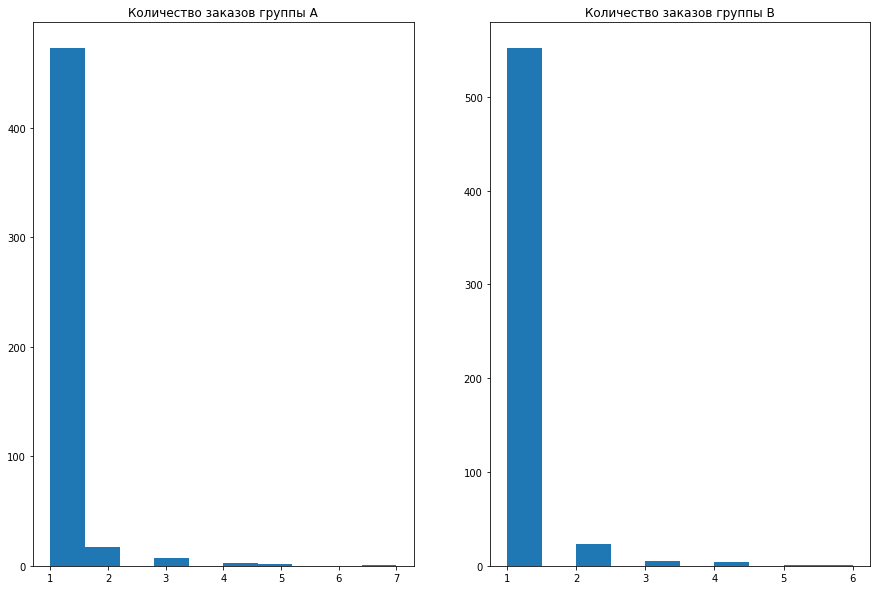

In [33]:
figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.hist(orders_by_userA['transaction_id'])
plt.title('Количество заказов группы А')
plt.subplot(1,2,2)
plt.hist(orders_by_userB['transaction_id'])
plt.title('Количество заказов группы В');

Вывод по разделу: По данным графикам видно, что подавляющее большинство пользователей в обеих группах делают 1 заказ, примерно 5-7% от общего числа делают 2+ заказа

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [34]:
print(np.percentile(orders_by_userA['transaction_id'], [95, 99]))

[2.   3.98]


Не более 5% пользователей в группе А сделали 2 заказа и всего не более 1% сделали ~4 заказа

In [35]:
print(np.percentile(orders_by_userB['transaction_id'], [95, 99]))

[2.   3.15]


В группе В не более 5% клиентов, которые оформили более 2 заказов, и не более 1% оформивших более 3 заказов

Вывод по разделу: 

95-й и 99-й перцентили количества заказов на одного пользователя соответственно:

    - для группы А: 2 и 3.98 заказа на пользователя
    - для группы В: 2 и 3.15 заказа на пользователя

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

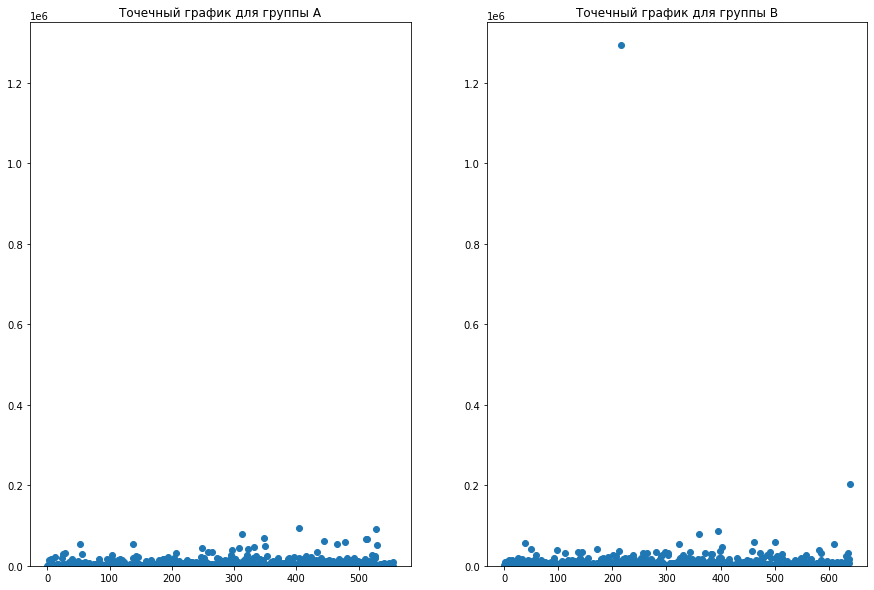

In [36]:
revenue_by_orderA = orders.query('group == "A"')['revenue']
revenue_by_orderB = orders.query('group == "B"')['revenue']

figure(figsize=(15, 10))

x_values = pd.Series(range(0,len(revenue_by_orderA)))
plt.subplot(1,2,1)
plt.title('Точечный график для группы A')
plt.scatter(x_values, revenue_by_orderA)
plt.ylim(0,1350000)

x_values = pd.Series(range(0,len(revenue_by_orderB)))
plt.subplot(1,2,2)
plt.title('Точечный график для группы B')
plt.scatter(x_values, revenue_by_orderB)
plt.ylim(0,1350000)

plt.show()

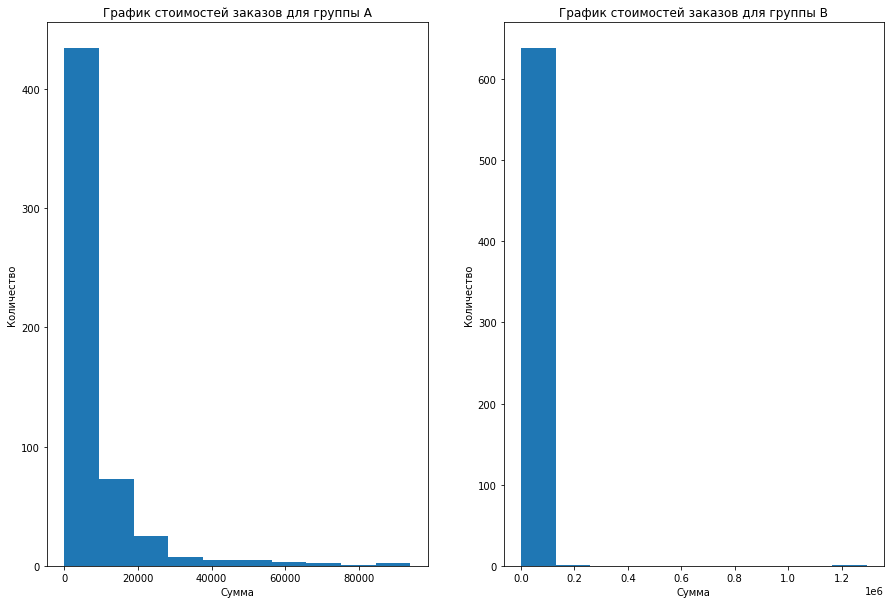

In [37]:
figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.hist(revenue_by_orderA)
plt.title('График стоимостей заказов для группы А')
plt.xlabel('Cумма')
plt.ylabel('Количество')
plt.subplot(1,2,2)
plt.hist(revenue_by_orderB)
plt.title('График стоимостей заказов для группы В')
plt.xlabel('Cумма')
plt.ylabel('Количество');

Вывод по разделу: В целом, группы похожи. У пользоватеелй обеих групп стоимость заказа в среднеи не превышает 10 тысяч, но у группы В есть заказ и на 1.2 млн, что значительно выше всех остальных, видимо, именно данный заказ и был сделан в период с 18-20 августа и значительно повлиял на график

###  Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [38]:
print(np.percentile(revenue_by_orderA, [95, 99]))

[26718.  62764.4]


В группе А не более 5% клиентов, которые оформили заказ на более чем 26718, и не более 1% оформивших  заказ на более чем 62764.4

In [39]:
print(np.percentile(revenue_by_orderB, [95, 99]))

[28787.45 55579.06]


В группе В не более 5% клиентов, которые оформили заказ на более чем 28787, и не более 1% оформивших  заказ на более чем 55579

Вывод по разделу:

Найденные нами 95-й и 99-й перцентили средних чеков равны:

    - для группы А: 26718 и 62764.4 рублей
    - для группы В: 28787.45 и 55579.06 рублей

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.


In [40]:
sampleA = pd.concat([
                     orders_by_userA['transaction_id'],
                     pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum()\
                     - len(orders_by_userA['transaction_id'])),
                     name='order_count')
                     ],axis=0)

sampleB = pd.concat([
                     orders_by_userB['transaction_id'],
                     pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum()\
                     - len(orders_by_userB['transaction_id'])),
                     name='order_count')
                    ],axis=0)

In [41]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Length: 18736, dtype: int64

Сформируем нулевую и альтернативные гипотезы:

    - H0 - статистически значимых различий в среднем количестве заказов между группами нет
    - H1 - статистически значимые различия в среднем количестве заказов между группами есть

In [42]:
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Вывод по разделу: Таким образом, по "сырым" данным значение p-value = 0.017 ~ 1,7%, что меньше уровня статистической значимости, следовательно гипотезу о том, что различий в конверсии между группами нет, отвергаем. Относительная разница в конверсии между группами составила 13,8%- на столько конверсия группы В больше конверсии группы А

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения. 

Сформулируем гипотезы:

    - Н0 - статистически значимых различий в среднем чеке заказа между группами нет
    - Н1 - статистически значимые различия в среднем чеке заказа между группами есть

In [43]:
#тест Манна-Уитни
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]))

#относительные различия суммы среднего чека
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


Вывод по разделу: По "сырым" данным значение p-value = 0.729, что значительно больше уровня статистической значимости, следовательно гипотезу о том, что различий в сумме среднего чека между группами нет, не отвергаем. Относительная разница суммы среднего чека между группами составила 25.9%- на столько сумма среднего чека группы В больше суммы среднего чека группы А, возможно, такая существенная относительная разница указывает на влияние выбросов на метрику

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

За "аномальных" пользователей для группы А примем тех, кто совершил больше 2 заказов или тех, кто совершил заказ на сумму больше 27000. Для группы В такими пользователями будут являться те, кто совершил больше 2 заказов или совершил заказ на сумму более 29000

Гипотезы:

    - Н0 - статистически значимых различий среднем количестве заказов между группами нет
    - Н1 - статистически значимые различия среднем количестве заказов между группами есть

Для начала узнаем, сколько всего было таких пользователей

In [44]:
usersWithManyOrdersA = orders_by_userA[orders_by_userA['transaction_id'] > 2]['visitor_id']
  
usersWithExpensiveOrdersA = orders[orders['revenue'] > 27000]['visitor_id']
abnormalUsersA = (
    pd.concat([usersWithManyOrdersA, usersWithExpensiveOrdersA], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsersA.head(5))
print(f'Количество аномальных пользователей группы A: {abnormalUsersA.shape[0]}') 

568     113298937
1099    148427295
18      199603092
928     204675465
23      237748145
Name: visitor_id, dtype: int64
Количество аномальных пользователей группы A: 73


In [45]:
usersWithManyOrdersB = orders_by_userB[orders_by_userB['transaction_id'] > 2]['visitor_id']
  
usersWithExpensiveOrdersB = orders[orders['revenue'] > 29000]['visitor_id']
abnormalUsersB = (
    pd.concat([usersWithManyOrdersB, usersWithExpensiveOrdersB], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsersB.head(5))
print(f'Количество аномальных пользователей группы B: {abnormalUsersB.shape[0]}') 

1099    148427295
928     204675465
37      249864742
684     358944393
648     382846391
Name: visitor_id, dtype: int64
Количество аномальных пользователей группы B: 61


In [46]:
sampleAFiltered = pd.concat(
    [
        orders_by_userA[
            np.logical_not(orders_by_userA['visitor_id'].isin(abnormalUsersA))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                visitors.query('group == "A"')['visitors'].sum() - len(orders_by_userA['transaction_id'])
            ),
            name='order_count',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        orders_by_userB[
            np.logical_not(orders_by_userB['visitor_id'].isin(abnormalUsersB))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                visitors.query('group == "B"')['visitors'].sum() - len(orders_by_userB['transaction_id'])
            ),
            name='order_count',
        ),
    ],
    axis=0,
) 

In [47]:
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.009
0.185


Вывод по разделу: По "очищенным" данным значение p-value = 0.009 ~ 0,9% (против 0,017 по "сырым" данным), что меньше уровня статистической значимости, значит нулевую гипотезу мы отвергаем. 

Относительная разница в конверсии между группами составила 18.5% - на столько конверсия группы В больше конверсии группы А (13.8% по "сырым" данным)

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения. 

Гипотезы:

    - Н0 - статистически значимых различий в среднем чеке заказа между группами нет
    - Н1 - статистически значимые различия в среднем чеке заказа между группами есть

In [48]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsersA)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsersB))
                )
            ]['revenue'], True, 'two-sided',
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsersB)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsersA)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.996
0.021


Вывод по разделу: По "очищенным" данным значение p-value = 0.996 (0.729 по "сырым" данным), что выше уровня статистической значимости, следовательно гипотезу о том, что различий в среднем чеке между группами нет, не отвергаем. 

Относительная разница в конверсии между группами составила 2.1% - на столько конверсия группы В больше конверсии группы А, что значительно меньше того показателя, который был при "сырых" данных (против 25.9% по "сырым" данным), теперь такого значительного превосходства у группы B нет

### Примите решение по результатам теста и объясните его

Из представленных 9 гипотез с применением фреймворка RICE нами была выбрана как наиболее приоритетная гипотеза 8 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

По результатам А/В-тестирования гипотезы были сделаны следующие выводы:

Кумулятивная выручка группы В стабильно выше выручки группы А, кроме того, мы видим ее значительный скачек в период с 18-20 августа 2019г.

Ситуация с кумулятивным средним чеком между группами не так однозначна: кривая группы В нестабильна, но все-таки выше аналогичной группы А почти на всём отрезке.

Кумулятивная конверсия группы В стабильно выше, чем у группы А.

В обеих группах подавляющее большинство пользователей сделали по одному заказу, очень мало - по 2, и еще меньше - по 3-7. У подавляющего большинства пользователей обоих групп сумма заказа не превышает 10 тыс. рублей. Тем не менее на графике группы В можно заметить один аномально большой заказ на сумму 1294500 руб. Это и есть причина резкого скачка кумулятивного среднего чека группы В. В остальном группы очень похожи между собой.

<b>В результате:</b>

Считаю, что тест можно считать успешным, так как различия среднего количества заказов между группами имеют статистическую значимость. То есть разница получена не случайным образом, а она действительно есть - в данном случае побеждает <b>группа В</b>. Средний чек же вырос, но незначительно, всего на пару процентов, тут, скорее, <b>изменений нет</b>, хотя есть вероятность того, что такой крупный заказ был совершён только благодаря внесённым изменениям.

Тест остановить, зафиксировать отсутствие различий между группами по сумме среднего чека и победу группы В в части повышенной конверсии.